In [135]:
import os
import scipy.io
import numpy as np
from py12_spike_data_preprocess_utils import preprocess_spike_data, preprocess_spike_data_1, clean_spike_data_1, clean_spike_data_2
import neuralflow
import matplotlib.pyplot as plt

brain_region_list = ['left_ALM', 'left_BLA', 'left_ECT', 'left_Medulla', 'left_Midbrain', 'left_Striatum', 'left_Thalamus'] +\
                    ['right_ALM', 'right_BLA', 'right_ECT', 'right_Medulla', 'right_Midbrain', 'right_Striatum', 'right_Thalamus']


In [136]:
brain_region = "left_Medulla"
date = 57
path = f"../data/raw_data/neural_data_{brain_region}/neural_data_{date}_{brain_region}.mat"
data = scipy.io.loadmat(path)
spike_counts_ori = data['region_data']
trial_counts_ori = int(data['trial_count'].squeeze())
num_neurons_ori = spike_counts_ori.shape[1]

In [137]:
# 现在换一种方法，手动清理神经元，可以防止上面的两种情况

# 最后约化的参数
num_trials= 40
num_neurons = 16

# 原始数据截取正确的时间段
spike_counts_reshape_ori = spike_counts_ori.reshape((-1, trial_counts_ori, num_neurons_ori), order='F')
spike_counts_reshape = spike_counts_reshape_ori[57:150,:,:]
spike_counts = spike_counts_reshape.reshape((-1, num_neurons_ori), order='F')
time_epoch = [(0, 1.86)] * int(trial_counts_ori)  # 原始数据的time_epoch

# 这边其实就需要clean_1, 要不然遇到极端情况会报错
# spike_counts, trial_counts_ori, time_epoch = clean_spike_data_1(spike_counts, trial_count=trial_counts_ori, timeepoch=time_epoch)
spiketimes, timeepoch = preprocess_spike_data_1(spike_counts, trial_counts_ori, time_epoch)



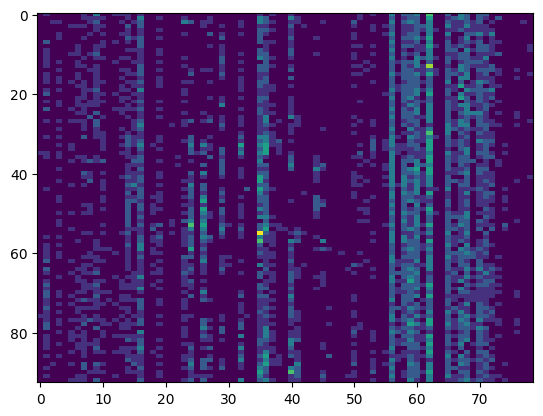

In [138]:
trial = 0
plt.imshow(spike_counts_reshape[:,trial,:], aspect='auto')

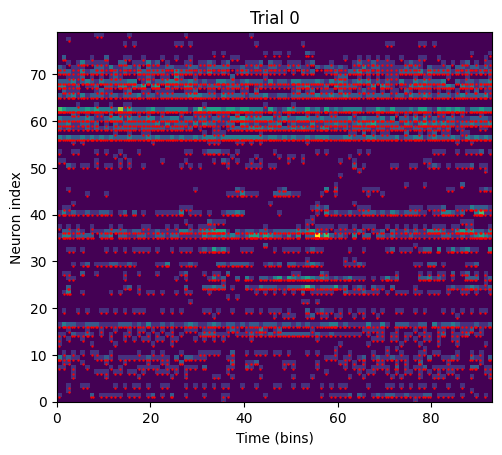

In [142]:
# 很明显地看出有x轴y轴反了的问题

import numpy as np
import matplotlib.pyplot as plt


trial = 0  # 举例
spiketimes_trial = spiketimes[:, trial]

# 获取时间轴长度（用于 extent）
n_timebins = spike_counts_reshape.shape[0]

# 绘制 imshow，设置 extent 和 origin
plt.imshow(
    spike_counts_reshape[:, trial, :].T,
    origin='lower',  # 关键：原点左下
    extent=[0, n_timebins, 0, spiketimes.shape[0]]  # [左, 右, 下, 上]
)

# 绘制 scatter，x 轴单位是 timebin，y 轴是 neuron index
for i in range(spiketimes.shape[0]):
    times = spiketimes_trial[i] * 50
    plt.scatter(times, [i] * len(times), s=0.5, color='red')

plt.xlabel('Time (bins)')
plt.ylabel('Neuron index')
plt.title(f'Trial {trial}')
plt.show()

In [140]:
spiketimes_trial[60]

array([0.005     , 0.01      , 0.015     , 0.02666667, 0.03333333,
       0.04666667, 0.05333333, 0.06666667, 0.07333333, 0.08666667,
       0.09333333, 0.10666667, 0.11333333, 0.125     , 0.13      ,
       0.135     , 0.14666667, 0.15333333, 0.17      , 0.19      ,
       0.20666667, 0.21333333, 0.225     , 0.23      , 0.235     ,
       0.245     , 0.25      , 0.255     , 0.265     , 0.27      ,
       0.275     , 0.29      , 0.305     , 0.31      , 0.315     ,
       0.32666667, 0.33333333, 0.34666667, 0.35333333, 0.36666667,
       0.37333333, 0.385     , 0.39      , 0.395     , 0.405     ,
       0.41      , 0.415     , 0.43      , 0.44666667, 0.45333333,
       0.46666667, 0.47333333, 0.485     , 0.49      , 0.495     ,
       0.505     , 0.51      , 0.515     , 0.53      , 0.54666667,
       0.55333333, 0.56666667, 0.57333333, 0.59      , 0.60666667,
       0.61333333, 0.62666667, 0.63333333, 0.65      , 0.66666667,
       0.67333333, 0.68666667, 0.69333333, 0.71      , 0.73   